<a href="https://colab.research.google.com/github/Nikhil-Chavanke-21/google_lens_translator/blob/master/google_lens_translate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title TTS

from google.colab import drive

drive.mount("/content/drive/",force_remount=True)

import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS
os.chdir("TensorFlowTTS")
!pip install  .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

# download pretrained feature generation model - Tacotron2
print("Downloading Tacotron2 model...")
!gdown --id {"12jvEO1VqFo1ocrgY9GUHF_kVcLn3QaGW"} -O tacotron2-120k.h5
!gdown --id {"1OI86hkN1YCpHBsIKnkELNbSho5Pj-pPY"} -O tacotron2_config.yml

# download pretrained vocoder model - melgan
print("Downloading MelGAN model...")
!gdown --id {"1A3zJwzlXEpu_jHeatlMdyPGjn1V7-9iG"} -O melgan-1M6.h5
!gdown --id {"1Ys-twSd3m2uqhJOEiobNox6RNQf4txZs"} -O melgan_config.yml

import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import AutoProcessor

tacotron2_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/tacotron2/conf/tacotron2.v1.yaml')
tacotron2 = TFAutoModel.from_pretrained(
    config=tacotron2_config,
    pretrained_path="tacotron2-120k.h5",
    name="tacotron2"
)
melgan_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/melgan/conf/melgan.v1.yaml')
melgan = TFAutoModel.from_pretrained(
    config=melgan_config,
    pretrained_path="melgan-1M6.h5",
    name="melgan"
)
print("Downloading ljspeech_mapper.json ...")
!gdown --id {"1YBaDdMlhTXxsKrH7mZwDu-2aODq5fr5e"} -O ljspeech_mapper.json

processor = AutoProcessor.from_pretrained(pretrained_path="./ljspeech_mapper.json")
tacotron2.setup_window(win_front=10, win_back=10)

def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
      tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
      tf.convert_to_tensor([len(input_ids)], tf.int32),
      tf.convert_to_tensor([0], dtype=tf.int32)
  )
  # vocoder part
  audio = vocoder_model(mel_outputs)[0, :, 0]
  return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()

Mounted at /content/drive/
Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 10290, done.
remote: Total 10290 (delta 0), reused 0 (delta 0), pack-reused 10290
Receiving objects: 100% (10290/10290), 131.38 MiB | 28.10 MiB/s, done.
Resolving deltas: 100% (4940/4940), done.
Processing /content/TensorFlowTTS
     |████████████████████████████████| 320.4MB 45kB/s 
     |████████████████████████████████| 706kB 33.8MB/s 
     |████████████████████████████████| 245kB 46.0MB/s 
     |████████████████████████████████| 225kB 45.0MB/s 
     |████████████████████████████████| 3.6MB 41.0MB/s 
     |████████████████████████████████| 1.3MB 41.3MB/s 
     |████████████████████████████████| 1.7MB 41.5MB/s 
     |████████████████████████████████| 3.1MB 27.9MB/s 
  Cloning https://github.com/repodiac/german_transliterate.git to /tmp/pip-install-m6mefl82/german-transliterate
  Running command git clone -q https://github.com/repodiac/german_transliterate.git /tmp/pip-install-m6mefl82/german-trans

Downloading...
From: https://drive.google.com/uc?id=12jvEO1VqFo1ocrgY9GUHF_kVcLn3QaGW
To: /content/tacotron2-120k.h5
128MB [00:01, 66.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OI86hkN1YCpHBsIKnkELNbSho5Pj-pPY
To: /content/tacotron2_config.yml
100% 1.49k/1.49k [00:00<00:00, 4.58MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A3zJwzlXEpu_jHeatlMdyPGjn1V7-9iG
To: /content/melgan-1M6.h5
17.1MB [00:00, 64.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ys-twSd3m2uqhJOEiobNox6RNQf4txZs
To: /content/melgan_config.yml
100% 1.29k/1.29k [00:00<00:00, 2.10MB/s]
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
Downloading...
From: https://drive.google.com/uc?id=1YBaDdMlhTXxsKrH7mZwDu-2aODq5fr5e
To: /content/ljspeech_mapper.json
100% 3.57k/3.5

In [ ]:
!pip install keras-ocr

     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 9.5MB 19.2MB/s 
     |████████████████████████████████| 860kB 31.0MB/s 
     |████████████████████████████████| 133kB 34.6MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.6-cp37-none-any.whl size=42937 sha256=1be9cfe576a078de62a19fd38edf7bb0a6787ce32b97f0e2f4ad16eb1f23f3a3
  Stored in directory: /root/.cache/pip/wheels/79/59/e6/79dd15333b911d51ea68d7e4c325e14f042eacc141201dca44
Successfully built keras-ocr


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


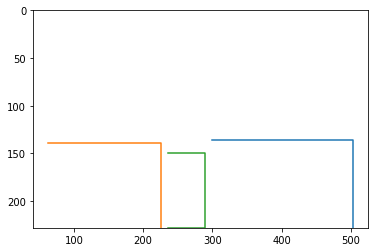

In [ ]:
import keras_ocr

import math
import cv2
import numpy as np
from textblob import TextBlob
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, ImageOps
import time

pipeline=keras_ocr.pipeline.Pipeline()

start_time=time.time()

image=Image.open('french.jpg')
# image=Image.open('german.jpeg')
# image=Image.open('german1.jpeg')
# image=Image.open('german2.jpeg')
images=[np.asarray(image)]

prediction_groups = pipeline.recognize(images)

# keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0])

m=sum([(y[1,1]-y[0,1])/(y[1,0]-y[0,0]) for _,y in prediction_groups[0]])/len(prediction_groups[0])

filtered_ocr=[(x,y) for x,y in prediction_groups[0] if abs((m-(y[1,1]-y[0,1])/(y[1,0]-y[0,0]))/(1+m*(y[1,1]-y[0,1])/(y[1,0]-y[0,0])))<0.2]
ver_axis=sum([(y[1,1]-y[0,1])/(y[1,0]-y[0,0]) for _,y in filtered_ocr])/len(filtered_ocr)
hor_axis=-1/ver_axis

centers=[(x,y,np.mean(y,axis=0)) for x,y in filtered_ocr]

ver_coor=[(x,y,z[1]-ver_axis*z[0]) for x,y,z in centers]
ver_coor.sort(key=lambda x:x[2])

ordered_words=[]
init_group=[]
b=float(math.inf)

for x,y,z in ver_coor:
  plt.ylim(max(y[:,1]), 0)
  plt.plot(y[:,0],y[:,1])
  if z<b:
    init_group.append((x,y))
  else:
    ordered_words.append(init_group)
    init_group=[(x,y)]
  b=(y[2,1]+y[3,1])/2-ver_axis*(y[2,0]+y[3,0])/2
ordered_words.append(init_group)

hor_ends=[]
ver_ends=[]
for i in range(len(ordered_words)):
  c=[(x,y,np.mean(y,axis=0)) for x,y in ordered_words[i]]
  hor_coor=[(x,y,z[0]-abs(hor_axis)*z[1]) for x,y,z in c]
  hor_coor.sort(key=lambda x:x[2])
  ordered_words[i]=[(x,y) for x,y,_ in hor_coor]
  first=ordered_words[i][0][1]
  last=ordered_words[i][-1][1]
  hor_ends.append(((first[0,:]+first[3,:])/2,(last[1,:]+last[2,:])/2))
  upper_mp=sum([np.mean(y[:2,:],axis=0) for _,y in ordered_words[i]])/len(ordered_words[i])
  lower_mp=sum([np.mean(y[2:,:],axis=0) for _,y in ordered_words[i]])/len(ordered_words[i])
  ver_ends.append((upper_mp,lower_mp))

hor_stretch=[abs(hor_axis*(x[0]-y[0])-(x[1]-y[1])) for x,y in hor_ends]
ver_stretch=[abs(ver_axis*(x[0]-y[0])-(x[1]-y[1])) for x,y in ver_ends]
stretch=[x/y for x,y in zip(hor_stretch,ver_stretch)]
m=sum([(x[0]-y[0])/(x[1]-y[1]) for x,y in hor_ends])/len(hor_ends)

sentence=' '.join([x[0] for y in ordered_words for x in y])
tb=TextBlob(sentence)
translated=tb.translate(to='en')

# spaces=[]
# for i, x in enumerate(translated):
#   if x==' ':
#     spaces.append(i)
# spaces=np.array(spaces)
# chars=len(translated)
# stretch=[x*chars/sum(stretch) for x in stretch]
# partition=[]
# s=0
# for x in stretch:
#   s+=x
#   partition.append(spaces[np.argmin((spaces-s)**2)])
# word_groups=[translated[:partition[0]]]
# for i in range(len(partition)-2):
#   word_groups.append(translated[partition[i]+1:partition[i+1]])
# word_groups.append(translated[partition[-2]+1:])

mels, alignment_history, audios=do_synthesis(str(translated), tacotron2, melgan, "TACOTRON", "MELGAN")

ipd.Audio(audios, rate=22050)

In [ ]:
print(translated)

hair cut


In [ ]:
import cv2

mask=image.copy()
pixels=mask.load()
im_pixels=image.load()
text_colors=[]

for i in range(image.size[0]):
  for j in range(image.size[1]):
    flag=0
    for p,q in zip(hor_ends,ver_ends):
      x,y=p
      z,w=q
      hor_slope=(w[1]-z[1])/(w[0]-z[0])
      ver_slope=(y[1]-x[1])/(y[0]-x[0])
      a=((x[1]-hor_slope*x[0])-(j-hor_slope*i))*((y[1]-hor_slope*y[0])-(j-hor_slope*i))/((y[1]-hor_slope*y[0])-(x[1]-hor_slope*x[0]))**2
      b=((z[1]-ver_slope*z[0])-(j-ver_slope*i))*((w[1]-ver_slope*w[0])-(j-ver_slope*i))/((w[1]-ver_slope*w[0])-(z[1]-ver_slope*z[0]))**2
      if a<0 and b<0.1:
        flag=1
        break
    if flag==0:
      pixels[i,j]=(0,0,0)
    else:
      pixels[i,j]=(255,255,255)

for p,q in zip(hor_ends,ver_ends):
  x,y=p
  z,w=q
  hor_slope=(w[1]-z[1])/(w[0]-z[0])
  ver_slope=(y[1]-x[1])/(y[0]-x[0])
  pixel_vals=[]
  for i in range(image.size[0]):
    for j in range(image.size[1]):
      a=((x[1]-hor_slope*x[0])-(j-hor_slope*i))*((y[1]-hor_slope*y[0])-(j-hor_slope*i))/((y[1]-hor_slope*y[0])-(x[1]-hor_slope*x[0]))**2
      b=((z[1]-ver_slope*z[0])-(j-ver_slope*i))*((w[1]-ver_slope*w[0])-(j-ver_slope*i))/((w[1]-ver_slope*w[0])-(z[1]-ver_slope*z[0]))**2
      if a<0 and b<0.1:
        pixel_vals.append(list(im_pixels[i,j]))
  pixel_vals=np.array(pixel_vals)

  pixel_vals = np.float32(pixel_vals)
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  k=2
  retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  centers = np.uint8(centers)
  color=centers[np.bincount(labels.reshape(-1)).argmin()]
  text_colors.append(tuple(color))

# plt.imshow(image)
# plt.imshow(mask)
image.save('original.jpg')
mask.save('mask.jpg')

In [ ]:
!pip install tensorflow==1.13.1
!pip install git+https://github.com/JiahuiYu/neuralgym

!cp original.jpg drive/My\ Drive/nlp/generative_inpainting/
!cp mask.jpg drive/My\ Drive/nlp/generative_inpainting/
%cd drive/My\ Drive/nlp/generative_inpainting/
!python test.py --image original.jpg --mask mask.jpg --output out.jpg --checkpoint_dir model_logs
%cd ../../../..

     |████████████████████████████████| 92.6MB 106kB/s 
     |████████████████████████████████| 368kB 40.8MB/s 
     |████████████████████████████████| 3.2MB 33.8MB/s 
ERROR: tensorflow-gpu 2.3.1 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow-gpu 2.3.1 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


  Cloning https://github.com/JiahuiYu/neuralgym to /tmp/pip-req-build-xt753iu_
  Running command git clone -q https://github.com/JiahuiYu/neuralgym /tmp/pip-req-build-xt753iu_
  Created wheel for neuralgym: filename=neuralgym-0.0.1-cp37-none-any.whl size=40428 sha256=ad83fc144b8fa7d2db39de9c630e1b44b6bff60cbf373528ca617b9528255eda
  Stored in directory: /tmp/pip-ephem-wheel-cache-m56uyafe/wheels/bc/dd/bc/fbaacf774dfc69223a01b3e037b8539f24318193a37221bb3b
Successfully built neuralgym
/content/drive/My Drive/nlp/generative_inpainting
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a fut

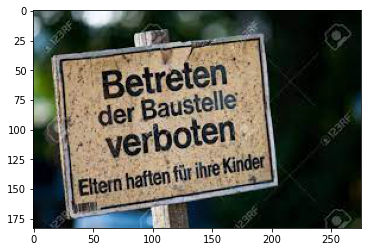

In [ ]:
out_image=Image.open('drive/My Drive/nlp/generative_inpainting/out.jpg')
for i,text in enumerate(word_groups):
  x=hor_ends[i]
  y=ver_ends[i]
  hor_slope=(x[0][1]-x[1][1])/(x[0][0]-x[1][0])
  hor_dist=((x[0][0]-x[1][0])**2+(x[0][1]-x[1][1])**2)**0.5
  ver_dist=((y[0][0]-y[1][0])**2+(y[0][1]-y[1][1])**2)**0.5
  f=ImageFont.truetype("BRIGHTON.TTF", int(min(hor_dist*1.87/len(text), ver_dist*(6/5))*1.25))

  width,height=f.getsize(str(text))

  txt=Image.new('L', (width,height))
  d=ImageDraw.Draw(txt)
  d.text((0,0),str(text),font=f, fill=255)
  w=txt.rotate(np.arctan(-hor_slope)*180/math.pi,expand=1)
  p,q=w.size
  out_image.paste(ImageOps.colorize(w,(0,0,0),text_colors[i]),(int((x[0][0]+x[1][0])/2-p/2),int((x[0][1]+x[1][1])/2-q/2)),w)
plt.imshow(image)

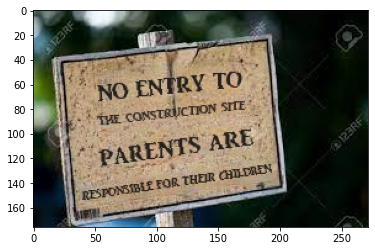

In [ ]:
plt.imshow(out_image)
out_image.save('out.jpg')